# pipeVibSim Example

This notebook demonstrates how to use the `pipeVibSim` library to perform a vibration analysis of a 3D pipe.

In [1]:
import numpy as np
from pipeVibSim.pipe_path import PipePath
from pipeVibSim.pipe import Pipe
from pipeVibSim.materials import get_material_properties
from pipeVibSim.simulation import VibrationAnalysis
import pipeVibSim.postprocessing as post

## 1. Define and Combine Pipe Segments

In [2]:
# Define the first pipe segment (e.g., steel)
points1 = np.array([[0, 0, 0], [0.2, 0, 0]], dtype=float)
pipe_path1 = PipePath(points1, radius=0.03, step=0.02)
n_elements1 = pipe_path1.node_positions.shape[0] - 1
material_properties1 = get_material_properties(
    E=200e9, rho=7850, nu=0.3, D_out=0.02, D_in=0.015, n_elements=n_elements1
)

# Define the second pipe segment (e.g., aluminum), which will be connected to the first
points2 = np.array([[0, 0, 0], [0, 0.2, 0]], dtype=float) # Defined from origin, will be attached to the end of segment 1
pipe_path2 = PipePath(points2, radius=0.03, step=0.02)
n_elements2 = pipe_path2.node_positions.shape[0] - 1
material_properties2 = get_material_properties(
    E=70e9, rho=2700, nu=0.35, D_out=0.02, D_in=0.015, n_elements=n_elements2
)

# Create the main pipe system from the first segment
pipe = Pipe(pipe_path1, material_properties1)

# Add the second segment
pipe.add_pipe_segment(pipe_path2, material_properties2)

print("Pipe system created by combining two segments.")
print(f"Total nodes: {pipe.node_positions.shape[0]}")
print(f"Total elements: {pipe.node_connectivity.shape[0]}")

Pipe system created by combining two segments.
Total nodes: 21
Total elements: 20


## 2. Perform Vibration Analysis

In [3]:
analysis = VibrationAnalysis(pipe)

## 3. Apply Constraints

In [4]:
# Fix the first node (origin) in all 6 degrees of freedom (translations and rotations)
constraints = [(pipe.node_positions[0], None)]
analysis.substructure_by_coordinate(constraints)
print("System constrained at the origin.")

System constrained at the origin.


### Eigensolution

In [5]:
shapes = analysis.run_eigensolution(maximum_frequency=4000)
print(shapes)

   Index,  Frequency,    Damping,     # DoFs
    (0,),   212.9835,    0.0000%,        126
    (1,),   222.5188,    0.0000%,        126
    (2,),   456.4435,    0.0000%,        126
    (3,),   473.0954,    0.0000%,        126
    (4,),  2050.7039,    0.0000%,        126
    (5,),  2071.8134,    0.0000%,        126
    (6,),  2850.2103,    0.0000%,        126
    (7,),  2891.3397,    0.0000%,        126



### Plot Mode Shapes

In [6]:
post.plot_mode_shapes(analysis.geometry, shapes)

QStandardPaths: wrong permissions on runtime directory /run/user/1002/, 0755 instead of 0700


### Frequency Response Function (FRF)

In [7]:
frequencies = np.linspace(0., 500, 1000)
frf = analysis.run_frf_direct(frequencies, load_dof_indices=[-4], response_dof_indices=[-4])

### Plot FRF

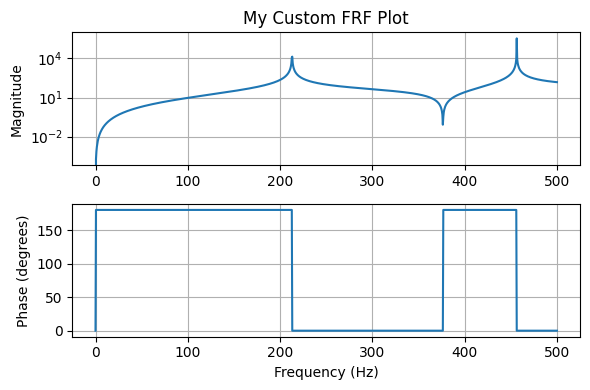

In [8]:
fig, axes = post.plot_frf(frf)
axes[0].set_title('My Custom FRF Plot')
axes[0].grid(True)
fig.set_size_inches(6, 4)
fig.tight_layout()